In [78]:
import numpy as np
import matplotlib.pyplot as plt

## Problem 1: Noisy Sine Waves

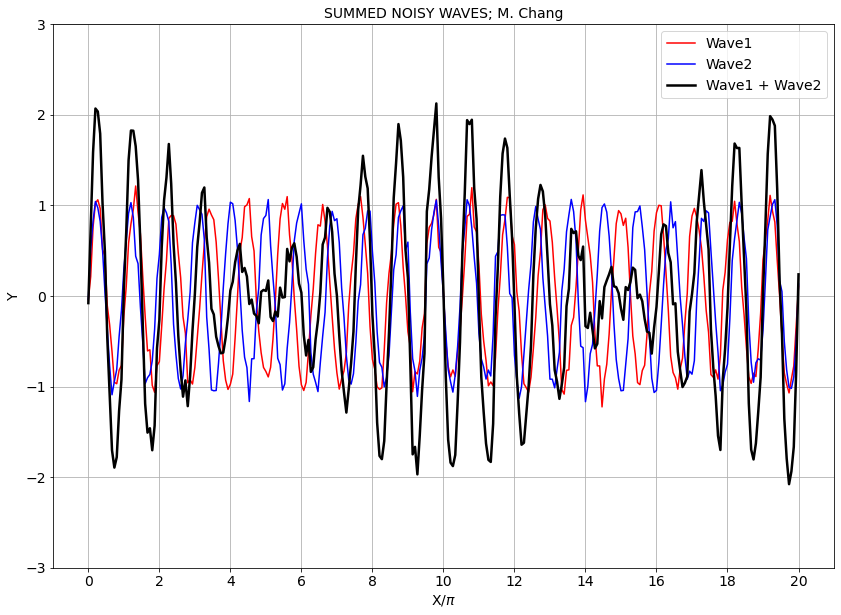

In [101]:
def noisysine(k_in, x_in, amp_in):
    # INPUT: k_in, wave number
    #        x_in, point
    #        amp_in, select amplitude
    # OUTPUT: y, sine wave with noise
    
    noisy_part = np.random.normal(0, amp_in, len(x_in)) #randomly generating amplitude noise, from Physics 4BL
    y = noisy_part + np.sin(k_in * x_in) #adding noise to regular sine wave
    return y

x_range = np.linspace(0, 20*np.pi, 301) #creating domain of x-points

y_range1 = noisysine(1.9, x_range, 0.1) #k = 1.9
y_range2 = noisysine(2.1, x_range, 0.1) #k = 2.1
y_addrange = y_range1 + y_range2 #adding the two to make beat function

lbls = ["Wave1", "Wave2", "Wave1 + Wave2"] #labels
clrs = ['r', 'b', 'k'] #colors
fs = 14 #fontsize

plt.figure(figsize = (14,10))

#Plots
plt.plot(x_range, y_range1, clrs[0], label = lbls[0])
plt.plot(x_range, y_range2, clrs[1], label = lbls[1])
plt.plot(x_range, y_addrange, clrs[2], label = lbls[2], linewidth = 2.5)

plt.grid()
plt.xlabel("X/$\pi$", fontsize = fs)

# changing tick labels
x_newrange = np.arange(0, 20*np.pi + 1, 2*np.pi)
tick_label = []

for x in x_newrange: #having the tick labels be in units of pi
    x_new = str(int(x / np.pi)) #dividing number by pi and making it a string
    tick_label.append(x_new)
    
plt.xticks(x_newrange, (tick_label), fontsize = fs) #ticks changed

plt.ylabel("Y", fontsize = fs)
plt.yticks(np.arange(-3, 4, 1), fontsize = fs) #making y-axis go from -3 to 3

plt.title("SUMMED NOISY WAVES; M. Chang", fontsize = fs)

plt.legend(fontsize = fs)

plt.savefig("Chang_NoisySineWaves.png", dpi = 150)

#When noise amplitude is set to zero, wave 1 and wave 2 are smoother (essentially regular waves) and the added version is also smoother and doesn't have a lot of "ridges" in it.

## Problem 2: Composite Function

In [47]:
name, age, depth = np.loadtxt("MOR_data.txt", unpack = True, dtype = str)

age = np.asarray(age, dtype = np.float)
depth = np.asarray(depth, dtype = np.float)

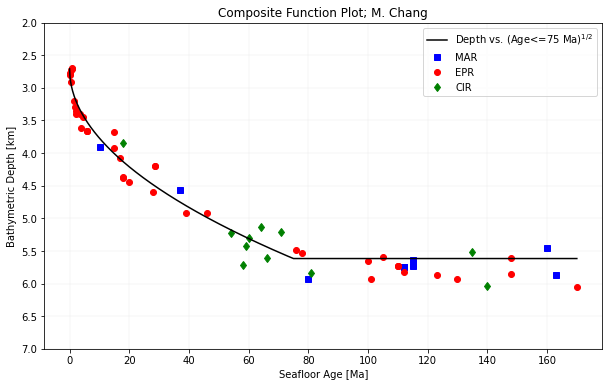

In [103]:
age_less75 = (age < 75) #boolean condition for data less than 75 myrs old

t = age[age_less75] #age data less than 75 myrs old
d = depth[age_less75] #depth data less than 75 myrs old

##################################################
# depth = m(age)^(1/2) + b
# y = mx + b
#
# param = np.polyfit((age)^(1/2), depth, 1)
# 
# m = param[0]
# b = param[1]
##################################################

param = np.polyfit(np.sqrt(t), d, 1) #fetching parameters
m = param[0]
b = param[1]


def bath_break(m, b, t_0):
    # INPUT: m, slope of linear fit curve from above
    #        b, intercept
    #        t_0, age boundary
    # OUTPUT: y, composite function
    
    x = np.linspace(0, np.max(age), 1000) #creating wide range of points
    LV = (x < t_0) #getting true and false values depending on x-value
    y = (m * np.sqrt(x) + b)*(LV) + (m * np.sqrt(t_0) + b)*(~LV) #for t < 75, a curve should be graphed, for t >= 75, a flat line leveling off should be there instead
    return y

#plotting the composite function
t0 = 75
x = np.linspace(0, np.max(age), 1000)
bath = bath_break(m, b, t0)

plt.figure(figsize = (10,6))
plt.plot(x, bath, 'k-', label = 'Depth vs. (Age<={} Ma)$^{{1/2}}$'.format(t0), zorder = 4)

plt.gca().invert_yaxis() #invert axis

names = ['MAR', 'EPR', 'CIR'] #labels
shape_clr = ['bs', 'ro', 'gd'] #colors and markers

for n in [0, 1, 2]: #looping through data and labels
    label_name = (name == names[n]) #boolean condition for matching data with certain marker
    age_name = age[label_name] #fishing out associated age data
    depth_name = depth[label_name] #fishing out associated depth data
    
    plt.plot(age_name, depth_name, shape_clr[n], label = names[n]) #plotting data
    
plt.grid(linewidth = 0.1)
plt.legend()
plt.xlabel("Seafloor Age [Ma]")
plt.ylabel("Bathymetric Depth [km]")
plt.title("Composite Function Plot; M. Chang")

plt.xticks(np.arange(0, np.max(age), 20))

y_newrange = np.arange(7000, 1800, -500) #making y-axis go from 7000 to 2000 m
tick_label = []

for y in y_newrange: #having the tick labels be in units of km
    y_new = str(y / 1000) #dividing number by 1000 and making it a string
    tick_label.append(y_new) #changing tick label
    
plt.yticks(y_newrange, tick_label) #y-axis now goes from 7 to 2 km
plt.savefig("Chang_CompositeFunction.png", dpi = 150)
plt.show()

## Problem 3: The Exponential-ator

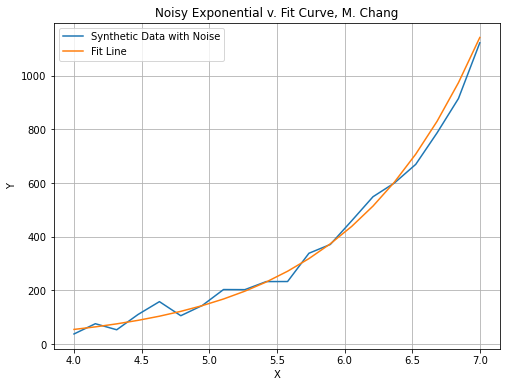

In [104]:
###################################################
# y = be^(mx)
# ln y = ln be^(mx)
# ln y = ln b + ln e^(mx) = ln b + mx
# 
# param = np.polyfit(x, ln y, 1)
# 
# param[0] = m
# param[1] = ln b
#
# b = e^(param[1])


def exptlator(x, y):
    # INPUT: x and y, see above
    # OUTPUT: m and b, slope and intercept
    param = np.polyfit(x, np.log(y), 1) #see above for why
    
    m = param[0] #slope
    b = np.exp(param[1]) #intercept
    
    return m, b

#Synthetic data
def noisyexponential(x, a):
    # INPUT: x, wide range of data points
    #        a, select amplitude
    # OUTPUT: y, noisy exponential curve
    
    noisy_part = np.random.normal(0, a, len(x)) #randomly generating amplitude noise, from Physics 4BL
    y = noisy_part + np.exp(x) #adding noise to regular exponential curve
    return y

plt.figure(figsize = (8, 6))

#constructing synthetic data
domain = np.linspace(4, 7, 20) #domain of points
synthetic = noisyexponential(domain, 25) #potentially adding 25 of noise to graph
plt.plot(domain, synthetic, label = "Synthetic Data with Noise")

#constructing data line
slope, intercept = exptlator(domain, synthetic) #fetching parameters
synthetic_fit = intercept*np.exp(slope * domain) #constructing synthetic fit line
plt.plot(domain, synthetic_fit, label = "Fit Line")
plt.legend()

plt.xlabel("X")
plt.ylabel("Y")
plt.grid()
plt.title("Noisy Exponential v. Fit Curve, M. Chang")

plt.savefig("Chang_Exponential-ator.png", dpi = 150)

## Problem 4: Pine Chapter 7, Number 2 (Rolling dice)

### Part (a)

In [106]:
def dice(n):
    # INPUT: n, the number of dice you wish to roll
    # OUTPUT: sum_dice, sum of the rolls
    
    sum_dice = 0
    
    for x in np.arange(0, n, 1): #looping as many times as there is dice
        roll = np.random.randint(1, 7) #choosing a number between 1 and 6
        sum_dice += roll #adding to total sum of numbers rolled
    
    return sum_dice

### Part (b)

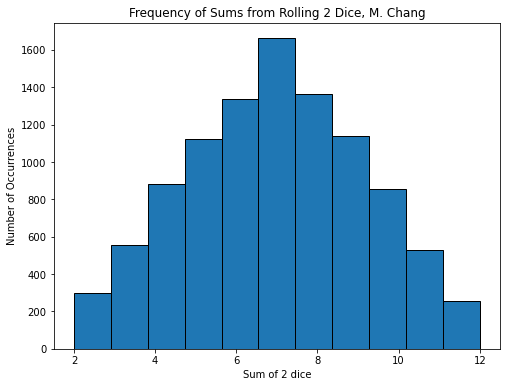

In [107]:
sums = []
d = 2 # rolling 2 dice

for x in np.arange(0, 10000, 1): # rolling 10,000 times
    sums.append(dice(d))

b = (6 * d) - (1 * d) + 1 #number of bins = number of outcomes
plt.figure(figsize = (8, 6))
plt.hist(sums, bins = b, edgecolor = 'black') #plotting histogram

plt.xlabel("Sum of {} dice".format(d))
plt.ylabel("Number of Occurrences")
plt.title("Frequency of Sums from Rolling {} Dice, M. Chang".format(d))

plt.savefig("Chang_2Dice.png", dpi = 150)

### Part (c)

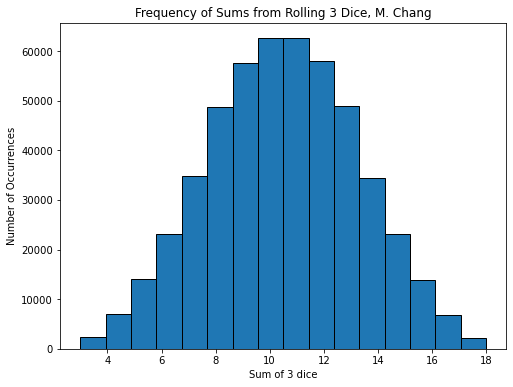

In [108]:
sums = []
d = 3 #rolling 3 dice

for x in np.arange(0, 500000, 1): #rolling 500,000 times
    sums.append(dice(d))

b = (6 * d) - (1 * d) + 1 #number of bins = number of outcomes
plt.figure(figsize = (8, 6))
plt.hist(sums, bins = b, edgecolor = 'black') #plotting histogram

plt.xlabel("Sum of {} dice".format(d))
plt.ylabel("Number of Occurrences")
plt.title("Frequency of Sums from Rolling {} Dice, M. Chang".format(d))

plt.savefig("Chang_3Dice.png", dpi = 150)

## Problem 5: Gilat Chapter 7, Number 38 (4-point Derivative)

### Part (a)

In [86]:
x = 0.25
def Funder(Fun, x0): #the numerical way
    # INPUT: Fun, the function being taken the derivative of
    #        x0, the point at which we are taking the derivative
    # OUTPUT: dfdx, derivative
    
    h = x0 / 10 #width of rectangle
    
    #derivative formula
    dfdx = ((Fun(x0 - 2*h) - 8*Fun(x0 - 1*h) + 0*Fun(x0 + 0*h) + 8*Fun(x0 + 1*h) - 1*Fun(x0 + 2*h)) / (12 * h))
    
    return dfdx

def Fun1(x): #the function
    # INPUT: x, the number that is being inputted to evalute the function
    # OUTPUT: y, the function as a result of x
    y = (x ** 2)*np.exp(x)
    return y

numerical1 = Funder(Fun1, x) #numerical result
print(numerical1)

def deriv1(x): #the analytical way
    # INPUT: x, the number at which the derivative is being evaluated at
    # OUTPUT: dydx, the derivative
    
    #the derivative of the function
    dydx = ((2 * x)*np.exp(x)) + ((x ** 2)*np.exp(x))
    return dydx

analytical1 = deriv1(x) #analytical result
print(analytical1) 

print(analytical1 - numerical1) #the difference between the two

0.7222639196059082
0.7222642968868546
3.7728094637312637e-07


### Part (b)

In [87]:
x = 2
def Fun2(x): #the function
    # INPUT: x, the number that is being inputted to evalute the function
    # OUTPUT: y, the function value at x
    y = (2 ** x) / x
    return y

numerical2 = Funder(Fun2, x) #the numerical answer
print(numerical2)

def deriv2(x): #the analytical way
    # INPUT: x, the number at which the derivative is being evaluated at
    # OUTPUT: y, the derivative at x
    
    #the derivative
    dydx = ((np.log(2) * (2 ** x)*x - (2 ** x)) / (x ** 2))
    return dydx

analytical2 = deriv2(x) #analytical way
print(analytical2)

print(analytical2 - numerical2) #difference between numerical and analytical

0.38639629470827475
0.3862943611198906
-0.00010193358838417321


### Part (c)

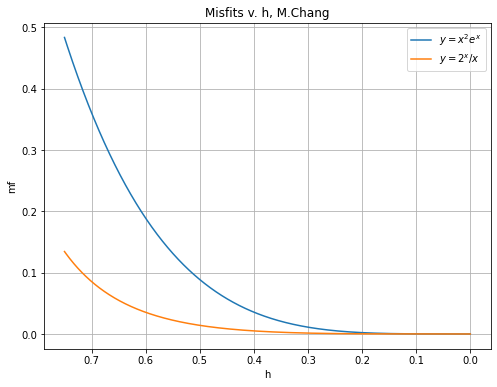

In [109]:

def Funder2(Fun, x0, h): #the numerical way
    # INPUT: Fun, the function being taken the derivative of
    #        x0, the point at which we are taking the derivative
    #         h, value of width
    # OUTPUT: dfdx, derivative
    
    #derivative formula
    dfdx = ((Fun(x0 - 2*h) - 8*Fun(x0 - 1*h) + 0*Fun(x0 + 0*h) + 8*Fun(x0 + 1*h) - 1*Fun(x0 + 2*h)) / (12 * h))
    
    return dfdx

#Part (a)
x = .25
h = np.linspace(0.75 * (10 ** -4), 0.75, 1000) #h-values
numerical1 = Funder2(Fun1, x, h) #finding derivatives via numerical method
mf = np.abs((numerical1 - analytical1) / analytical1) #misfits
plt.figure(figsize = (8, 6))
plt.plot(h, mf, label = '$y = x^{2}e^{x}$')

#Part (b)
x = 2
numerical2 = Funder2(Fun2, x, h) #finding derivatives via numerical method
mf = np.abs((numerical2 - analytical2) / analytical2) #misfits

plt.plot(h, mf, label = '$y = 2^{x}/x $')
plt.gca().invert_xaxis() #flipping x-axis to see h approaching zero, from left to right

plt.legend()

plt.xlabel('h')
plt.ylabel('mf')
plt.grid(zorder = -1)

plt.title('Misfits v. h, M.Chang')

plt.savefig("Chang_Misfits.png", dpi = 150)